Q1.) Write a Python program that asks the user for a number and prints the sum of all numbers from 1 to the input number using a loop. Include error handling to ensure the input is a positive integer.

In [3]:
import logging
logging.basicConfig(level=logging.INFO, format="%(message)s")

def sum_of_number():
    
    number = int(input("Enter a positive number : "))
    if number<0:
        raise ValueError('Enter a positive number')
        #logging.info("Enter a positive number")
        #return
    sum=0
    for i in range(1,number+1):
        sum+=i
    return sum
try:
    print(sum_of_number())
except ValueError as e:
    print(e)


invalid literal for int() with base 10: ''


Q2.) Create a Python class named Rectangle with two attributes,length and width. Write a method within the class that calculates the area of the rectangle. Then, write a function outside of the class that takes an instance of Rectangle and prints the area.

In [4]:
class Rectangle:

    def __init__(self, length, width):
        self.length= length
        self.width= width

    def getAreaOfRectangle(self):
        return self.length * self.width
    
try:
    l= int(input("Enter the length value"))
    b= int(input("Enter the breadth value"))
    if l<0 or b<0:
        raise ValueError("Enter positive values for length and breadth")
    Rect = Rectangle(10,20)
    print(Rect.getAreaOfRectangle())

except ValueError as e:
    print(e)


invalid literal for int() with base 10: ''


Q3.) Using the Numpy package, generate a 10×10 array of random integers between 1 and 100. Write a function that replaces all elements in the array that are greater than 50 with the value −1. Demonstrate this functionality with an example

In [5]:
import numpy as np

def replace(arr,t):
    arr[arr>t]=-1
    return arr


randomArray= np.random.randint(1,101,(10,10))
threshold=50
print("Random Array without Replacement \n ", randomArray)
print("Random Array with Replacement \n ",replace(randomArray,threshold))




Random Array without Replacement 
  [[92 78 52 30 18 36 58 78 96 97]
 [42 15 97 44 20 40 66 94  8 39]
 [75 27 28 62 59  2 91 69 53 38]
 [75  5 43 62 47 23 69 46 36 12]
 [85 73 31 93 86 60 14 13 26 59]
 [43 50 95 26 15 20 73 12 41 75]
 [86 17 50  4 24 43 70 19 53 33]
 [69 68 37 68 49  8 48 12 78 82]
 [99 39 98  2 24 72 71 46 49 21]
 [86 26 43 87 37 34 69 14 56 97]]
Random Array with Replacement 
  [[-1 -1 -1 30 18 36 -1 -1 -1 -1]
 [42 15 -1 44 20 40 -1 -1  8 39]
 [-1 27 28 -1 -1  2 -1 -1 -1 38]
 [-1  5 43 -1 47 23 -1 46 36 12]
 [-1 -1 31 -1 -1 -1 14 13 26 -1]
 [43 50 -1 26 15 20 -1 12 41 -1]
 [-1 17 50  4 24 43 -1 19 -1 33]
 [-1 -1 37 -1 49  8 48 12 -1 -1]
 [-1 39 -1  2 24 -1 -1 46 49 21]
 [-1 26 43 -1 37 34 -1 14 -1 -1]]


Q4.) Create a 1D Numpy array of 100 evenly spaced numbers between 0 and 2π. Calculate the sine and cosine of these numbers using Numpy’s broad-casting feature. Use Matplotlib to plot both the sine and cosine functionson the same graph, with appropriate labels and a legend.

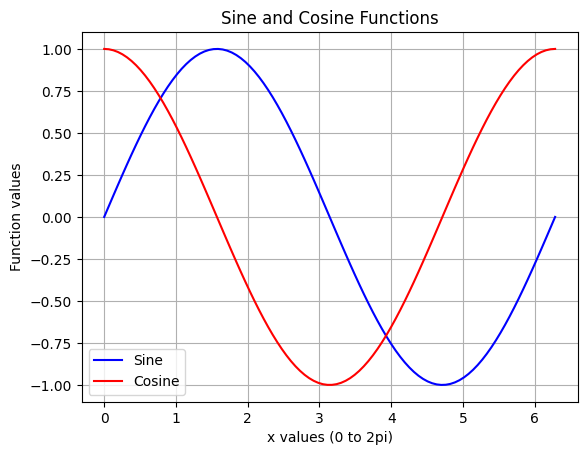

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_sine_cosine():
    x=np.linspace(0,2*np.pi,100)
    y1= np.sin(x)
    y2=np.cos(x)

    ''' plt.plot(x,y1,label='Sine')
    plt.plot(x,y2,label='Cosine')
    plt.legend()
    plt.show()'''

    plt.plot(x, y1, label='Sine', color='blue')  
    plt.plot(x, y2, label='Cosine', color='red')  
    plt.legend() 
    plt.xlabel("x values (0 to 2pi)")  
    plt.ylabel("Function values")  
    plt.title("Sine and Cosine Functions")  
    plt.grid() 
    plt.show()

plot_sine_cosine()



Q5.) Load an image using OpenCV and convert it to grayscale. Then, usingthe scikit-learn library, divide the image into a grid of 4×4 pixel regions and compute the average colour of each region. Display the resulting grid of average colours as an image. Make sure to include comments explainingeach step of your process.

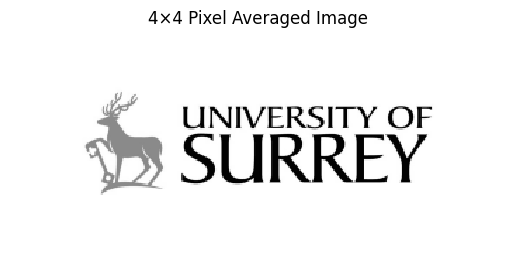

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('surrey.png', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Step 2: Get the image dimensions
height, width = image.shape

# Step 3: Define the grid size (each region is 4x4 pixels)
grid_size = 4  

# Step 4: Resize the image so its dimensions are multiples of the grid size
# This ensures even division into 4x4 patches
new_height = (height // grid_size) * grid_size
new_width = (width // grid_size) * grid_size
image_resized = cv2.resize(image, (new_width, new_height))

# Step 5: Divide the image into non-overlapping 4x4 regions and compute the average color
h_blocks = new_height // grid_size  # Number of 4x4 blocks vertically
w_blocks = new_width // grid_size  # Number of 4x4 blocks horizontally

averaged_image = np.zeros((h_blocks, w_blocks), dtype=np.uint8)

for i in range(h_blocks):
    for j in range(w_blocks):
        # Extract the 4x4 region
        block = image_resized[i * grid_size:(i + 1) * grid_size, j * grid_size:(j + 1) * grid_size]
        # Compute the average pixel value of the region
        averaged_image[i, j] = int(np.mean(block))

# Step 6: Display the downsampled image using Matplotlib
plt.imshow(averaged_image, cmap='gray', interpolation='nearest')
plt.title('4×4 Pixel Averaged Image')
plt.axis('off')  # Hide axis labels
plt.show()


In [36]:

import cv2
from sklearn.feature_extraction.image import extract_patches_2d,reconstruct_from_patches_2d
import numpy as np
import matplotlib.pyplot as plt


def computeAvgColour(grey_img,patch_size=4):
    h,w = grey_img.shape
    averaged = np.zeros_like(grey_img)
    for i in range(0,h-patch_size+1,patch_size):
        for j in range(0,w-patch_size+1,patch_size):
            averaged[i:i+patch_size,j:j+patch_size]= np.mean(grey_img[i:i+patch_size,j:j+patch_size])
    return averaged

def computeAvgColourFasterVersion(grey_img,patch_size=4):
    h, w = grey_img.shape
    new_h = h - (h % patch_size)
    new_w = w - (w % patch_size)
    grey_img = grey_img[:new_h, :new_w]
    patches = grey_img.reshape(
        new_h // patch_size, patch_size, new_w // patch_size, patch_size
    )
    patch_means = patches.mean(axis=(1, 3))
    averaged = np.repeat(np.repeat(patch_means, patch_size, axis=0), patch_size, axis=1)
    return averaged
    
    

def computeAvgColorUsingScikitLib(grey_img,patch_size=4):
    print('grey_img.shape: ',grey_img.shape)
    
    patches= extract_patches_2d(grey_img,(patch_size,patch_size)) # returns array_of_shape(number_of_patches,patches_height,patches_width)
    print("Patches shape: ", patches.shape)

    patch_means= patches.mean(axis=(1,2)) # axis=(1,2) means taking the mean using first and second dimension of patch_means which is basically the size of each patch.
    print("patch_means_shape: ",patch_means.shape)

    new_patches = np.full((patches.shape[0],patch_size,patch_size),patch_means[:,np.newaxis,np.newaxis])
    print("new_pathches_shape: ",new_patches.shape)
    
    averaged_image=reconstruct_from_patches_2d(new_patches, grey_img.shape)
    return averaged_image



grey_img.shape:  (645, 1415)
Patches shape:  (906504, 4, 4)
patch_means_shape:  (906504,)
new_pathches_shape:  (906504, 4, 4)


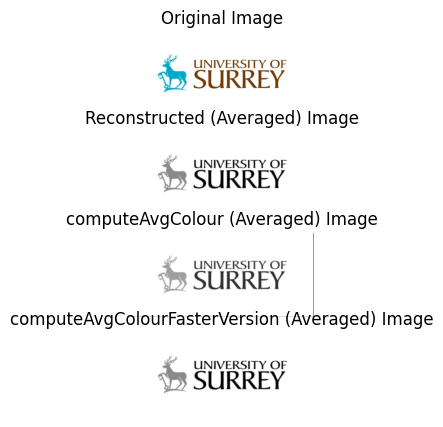

In [37]:

img= cv2.imread('surrey.png')
greyscaleImage= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
reconstructed_image_using_ScikitLib= computeAvgColorUsingScikitLib(greyscaleImage)
reconstructed_image_computeAvgColour= computeAvgColour(greyscaleImage)
reconstructed_image__computeAvgColourFasterVersion= computeAvgColourFasterVersion(greyscaleImage)



fig, axes = plt.subplots(4, 1, figsize=(10, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(reconstructed_image_using_ScikitLib, cmap='gray')
axes[1].set_title("Reconstructed (Averaged) Image")
axes[1].axis("off")
axes[2].imshow(reconstructed_image_computeAvgColour, cmap='gray')
axes[2].set_title("computeAvgColour (Averaged) Image")
axes[2].axis("off")
axes[3].imshow(reconstructed_image__computeAvgColourFasterVersion, cmap='gray')
axes[3].set_title("computeAvgColourFasterVersion (Averaged) Image")
axes[3].axis("off")
plt.show()

